In [1]:
import numpy as np
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2,nl1,nl2,f1,f2,w1,w2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,(-(b1*y1)-(k1*x1)+(nl1*(x1**3))-(k2*(x1-x2))+((nl2)*(x1-x2)**3+(f1*np.cos(w1*t))))/m1,
         y2,
         (-(b2*y2)-(k2*(x2-x1))+(nl2*(x2-x1)**3)+f2*np.cos(w2*t))/m2]
    return f

In [2]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 0.0
b2 = 0.0
#coeficiente no linear
nl1 =-(1/6)
nl2 =-(1/10)
#Fuerza
f1 = 0.0
f2 = 0.0
#Frecuencias
w1 = 0.0
w2 = 0.0
# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = -0.5
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 20.0
numpoints = 1000

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2,nl1,nl2,f1,f2,w1,w2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print  (t1, w1[0], w1[1], w1[2], w1[3], file=f)
        

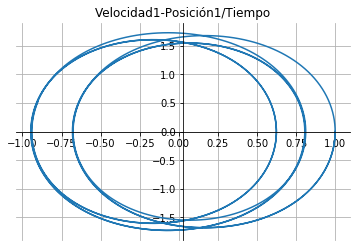

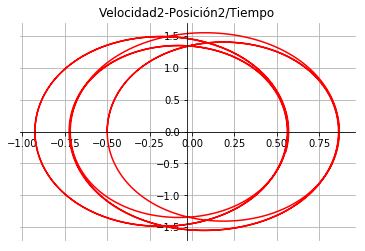

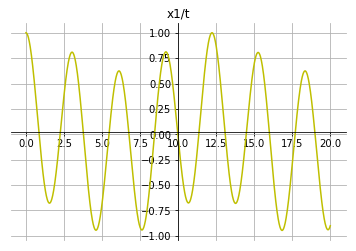

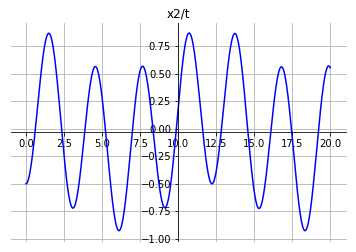

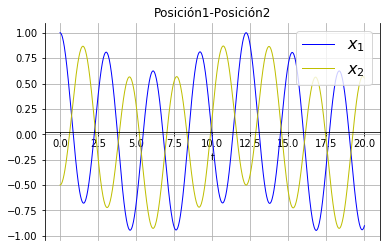

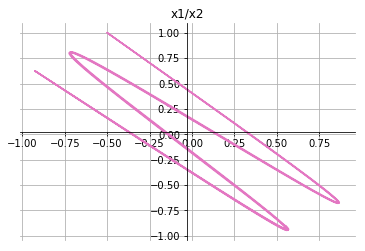

In [1]:
import numpy as np
from matplotlib.font_manager import FontProperties
t, x1, y1, x2, y2 = np.loadtxt('two_springs.dat', unpack=True)
import math
import numpy as np
import matplotlib.pyplot as mpl

#Nueva Gráfica #Velocidad1 Vs Posición1
import math
import numpy as np
from pylab import savefig
import matplotlib.pyplot as mpl
fig = mpl.figure()
ax = fig.add_subplot(1, 1, 1)

# Mover los ejes de la izquierda y abajo hacia el centro(0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# eliminar los ejes superiores y de la derhca
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
mpl.title('Velocidad1-Posición1/Tiempo')
mpl.grid()
mpl.plot(x1,y1)
mpl.savefig('vel_x_1.png', dpi=100)
mpl.show()
#Nueva Gráfica #Velocidad2 Vs Posición2
import math
import numpy as np
from pylab import savefig
import matplotlib.pyplot as mpl
fig = mpl.figure()
ax = fig.add_subplot(1, 1, 1)

# Mover los ejes de la izquierda y abajo hacia el centro(0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# eliminar los ejes superiores y de la derhca
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
mpl.title('Velocidad2-Posición2/Tiempo')
mpl.grid()
mpl.plot(x2,y2,'r')
mpl.savefig('vel2_x_2.png', dpi=100)
mpl.show()
#Gráfica de x1 Vs t

import math
import numpy as np
from pylab import savefig
import matplotlib.pyplot as mpl
fig = mpl.figure()
ax = fig.add_subplot(1, 1, 1)

# Mover los ejes de la izquierda y abajo hacia el centro(0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# eliminar los ejes superiores y de la derecha
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
mpl.title('x1/t')
mpl.grid()
mpl.plot(t,x1,'y')
mpl.savefig('t-x1.png', dpi=100)
mpl.show()
#Gráfica x2
import math
import numpy as np
from pylab import savefig
import matplotlib.pyplot as mpl
fig = mpl.figure()
ax = fig.add_subplot(1, 1, 1)

# Mover los ejes de la izquierda y abajo hacia el centro(0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# eliminar los ejes superiores y de la derecha
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
mpl.title('x2/t')
mpl.grid()
mpl.plot(t,x2,'b')
mpl.savefig('t-x2.png', dpi=100)
mpl.show()
#Gráfica  Posición1 Vs Posición2
fig = mpl.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
mpl.xlabel('t')
mpl.grid(True)

lw = 1

mpl.plot(t, x1, 'b', linewidth=lw)
mpl.plot(t, x2, 'y', linewidth=lw)

mpl.legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
mpl.title('Posición1-Posición2')
mpl.savefig('Posición1_Posición2.png', dpi=100)
mpl.show()
#############
#Gráfica x1 Vs x2
import math
import numpy as np
from pylab import savefig
import matplotlib.pyplot as mpl
fig = mpl.figure()
ax = fig.add_subplot(1, 1, 1)

# Mover los ejes de la izquierda y abajo hacia el centro(0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# eliminar los ejes superiores y de la derecha
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
mpl.title('x1/x2')
mpl.grid()
mpl.plot(x2,x1,'tab:pink')
mpl.savefig('x1_x2.png', dpi=100)
mpl.show()